In [1]:
!pip install pyspark
from tqdm import tqdm
import pandas as pd
!pip install gensim==3.8.3
import gensim
from gensim import corpora, models, similarities

In [2]:
from pyspark import SparkContext
sc = SparkContext("local", "NewYorkTimes_Article")

In [3]:
newsArticle = "/content/nytimes_news_articles.txt" 
articleFile = sc.textFile(newsArticle).cache()
newsData = articleFile.collect()
newsData

['URL: http://www.nytimes.com/2016/06/30/sports/baseball/washington-nationals-max-scherzer-baffles-mets-completing-a-sweep.html',
 '',
 'WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.',
 '“We were going to ride our pitching,” Manager Terry Collins said before Wednesday’s game. “But we’re not riding it right now. We’ve got as many problems with our pitching as we do anything.”',
 'Wednesday’s 4-2 loss to the Washington Nationals was cruel for the already-limping Mets. Pitching in Steven Matz’s place, the spot starter Logan Verrett allowed two runs over five innings. But even that was too large a deficit for the Mets’ lineup to overcome against Max Scherzer, the Nationals’ starter.',
 '“We’re not even giving ourselves chances,” Collins said, adding later, “We just 

In [4]:
from tqdm import tqdm
categories = {}
for i, x in enumerate(tqdm(newsData)):
  # if i == 20000:
  #   break
  if 'URL:' in x:
    category = x.split('.com')[1].split('/')[4]
    if category == 'us':
      category = f"{category}/{x.split('.com')[1].split('/')[5]}"
    if category not in categories:
      categories[category] = {'count': 1, 'article': ''}
    else:
      categories[category]['count'] +=1
  else:
    categories[category]['article'] += (', '+x)


100%|██████████| 192577/192577 [03:06<00:00, 1034.05it/s]


In [5]:
cat_count = [(key, categories[key]['count']) for key in categories]
cat_count.sort(reverse=True,key = lambda x: x[1])
top5 = cat_count[:5]
top5

[('sports', 1268),
 ('world', 1211),
 ('business', 1041),
 ('nyregion', 663),
 ('arts', 663)]

In [6]:
import string
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import *
from PIL import Image as ImPIL
import matplotlib.pyplot as plt

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

wordclouds = []
for x, _ in top5:
  mycat = categories[x]['article']
  # break
  sen = remove_stopwords(mycat)
  text_tokens = preprocess_string(sen)
  no_punctuation = [char.strip() for char in text_tokens if (char.strip() not in string.punctuation) and char.strip().isalnum()]
  filtered_sentence = ','.join(no_punctuation)
  # We use the ImageColorGenerator library from Wordcloud 
  # Here we take the color of the image and impose it over our wordcloud
  # image_colors = ImageColorGenerator(Mask)
  filtered_sentence
  #Generating the wordcloud :
  wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(filtered_sentence)
  wordclouds.append(wordcloud)

In [7]:
print(wordclouds[0])

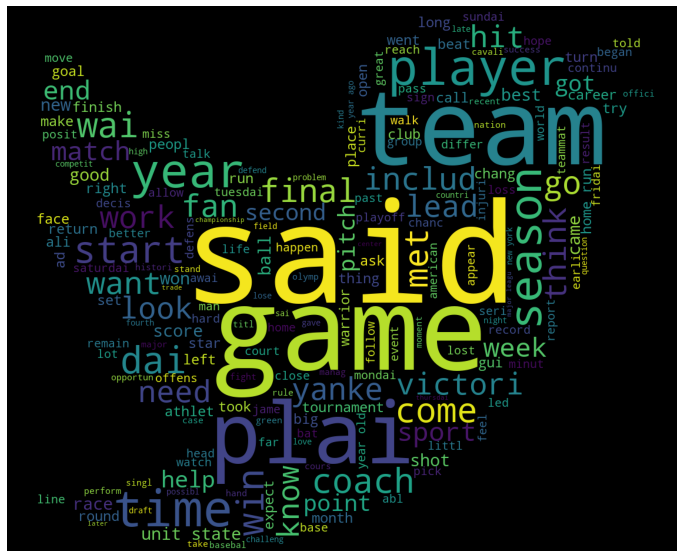

In [8]:
# Sports
#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordclouds[0]) 
#To remove the axis value :
plt.axis("off") 
plt.show()

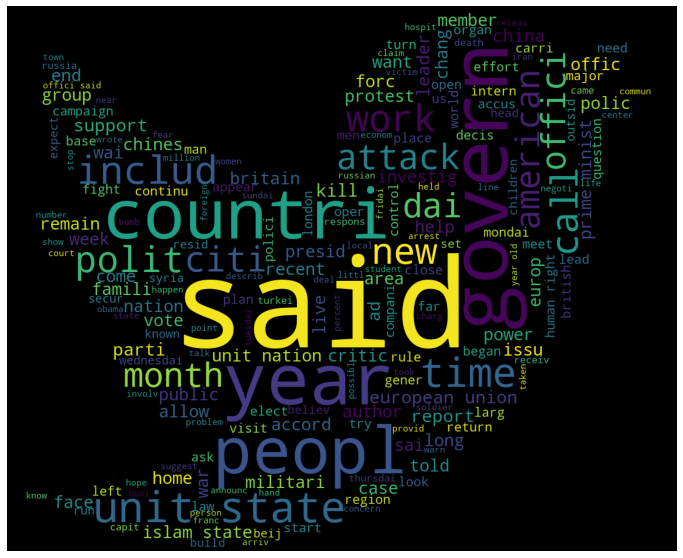

In [9]:
# World
#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordclouds[1]) 
#To remove the axis value :
plt.axis("off") 
plt.show()

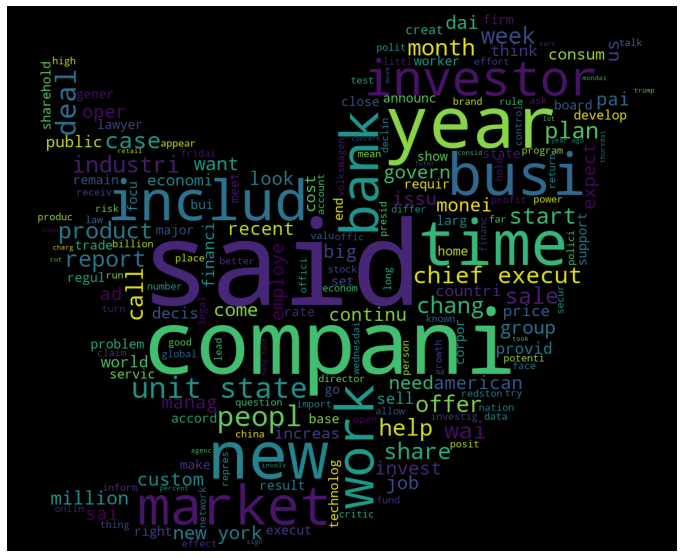

In [10]:
# business
#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordclouds[2]) 
#To remove the axis value :
plt.axis("off") 
plt.show()

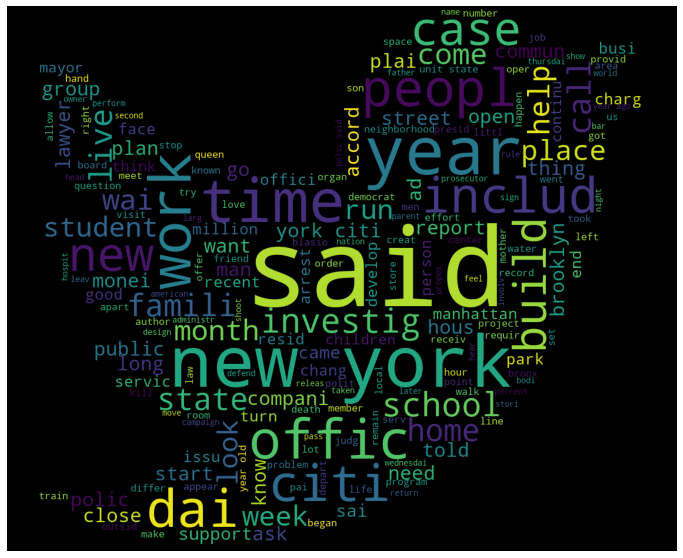

In [11]:
# nyregion
#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordclouds[3]) 
#To remove the axis value :
plt.axis("off") 
plt.show()

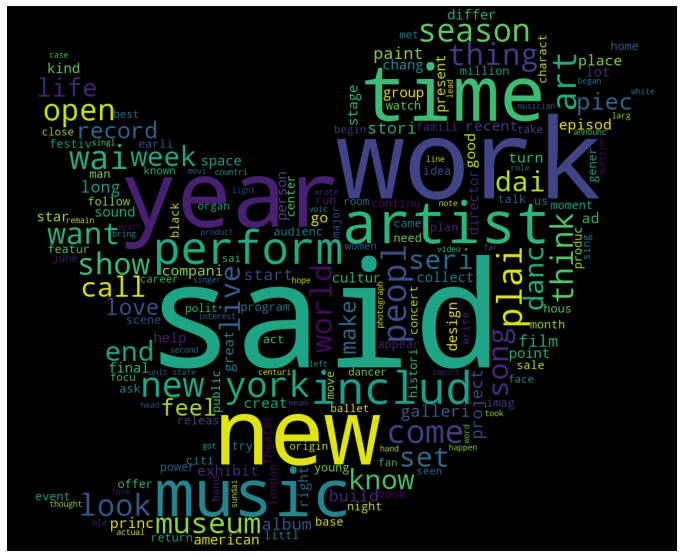

In [12]:
# arts
# business
#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordclouds[4]) 
#To remove the axis value :
plt.axis("off") 
plt.show()